# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [14]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import exchange_economy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

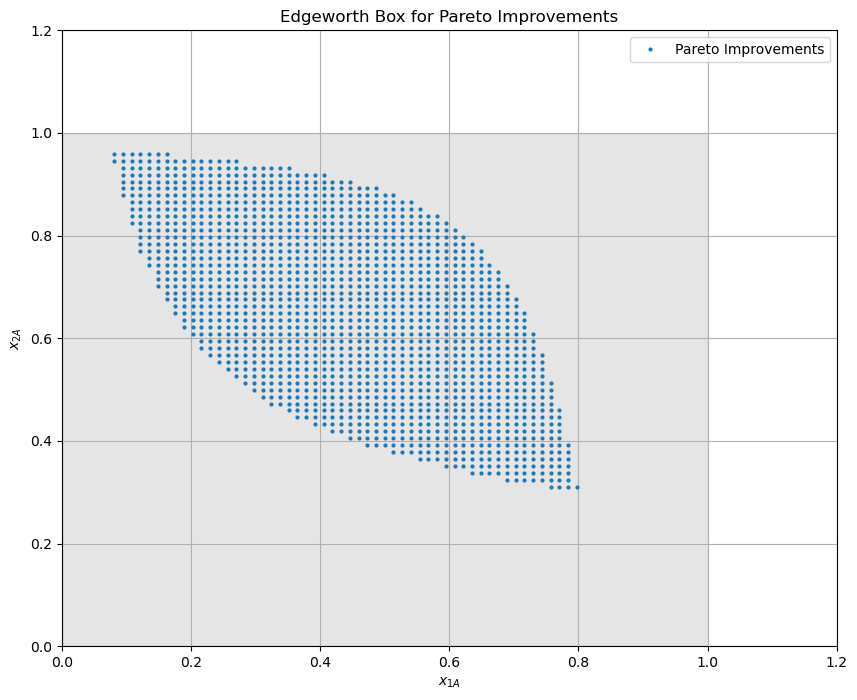

In [33]:
#Starting with refering to utillity-functions and conditions:
import matplotlib.pyplot as plt 

def demand_A(self, p1):
        p2 = 1  # Numeraire
        x1A = self.par.alpha / p1 * (self.par.w1A + p1/p2 * self.par.w2A)
        x2A = (1 - self.par.alpha) / p2 * (self.par.w1A + p1/p2 * self.par.w2A)
        return x1A, x2A

def demand_B(self, p1):
        p2 = 1  # Numeraire
        w1B = 1 - self.par.w1A  # Endowment of B for good 1
        w2B = 1 - self.par.w2A  # Endowment of B for good 2
        x1B = self.par.beta / p1 * (w1B + p1/p2 * w2B)
        x2B = (1 - self.par.beta) / p2 * (w1B + p1/p2 * w2B)
        return x1B, x2B


# Initialize the exchange economy
economy = ExchangeEconomyClass()

# Calculate the utility at endowment for both A and B
utility_endowment_A = economy.utility_A(economy.par.w1A, economy.par.w2A)
utility_endowment_B = economy.utility_B(1 - economy.par.w1A, 1 - economy.par.w2A)

# Discretize the space
N = 75
x1A_values = np.linspace(0, 1, N)
x2A_values = np.linspace(0, 1, N)

# Initialize lists to hold Pareto improvements
pareto_x1A = []
pareto_x2A = []

# Check each combination
for x1A in x1A_values:
    for x2A in x2A_values:
        x1B = 1 - x1A
        x2B = 1 - x2A

        # Calculate utilities
        utility_A = economy.utility_A(x1A, x2A)
        utility_B = economy.utility_B(x1B, x2B)

        # Check if both A and B are at least as well off
        if utility_A >= utility_endowment_A and utility_B >= utility_endowment_B:
            pareto_x1A.append(x1A)
            pareto_x2A.append(x2A)

# Plot the Pareto improvements in the Edgeworth box
plt.figure(figsize=(10, 8))
plt.plot(pareto_x1A, pareto_x2A, 'o', markersize=2, label='Pareto Improvements')
plt.title('Edgeworth Box for Pareto Improvements')
plt.xlabel('$x_{1A}$')
plt.ylabel('$x_{2A}$')
plt.xlim(0,1.2)
plt.ylim(0,1.2)
plt.legend()
plt.grid(True)
black_box = plt.Rectangle((0, 0), 1, 1, facecolor='black', edgecolor='black', alpha=0.1)  # alpha controls transparency
plt.gca().add_patch(black_box)
plt.show()

# Question 2

Explain your code and procedure

In [ ]:
# code

# Question 3

Explain your code and procedure

In [ ]:
#Example text223

ADD CONCISE CONLUSION.